PROBLEM DESCRRIPTION: Some Footballers are over-priced. Therefore, I believe Football Clubs need a model to get an estimate of how much a player is truly wworth in order not to be extorted.

In this notebook, I identified the candidates for the most significant features that can be used to predict the market value of footballers. The values of the market value are continuous and numerical. Therefore, I proceeded to build a regression model to estimate the market value with the highly statistical significant features I was able to identify.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
footballData = pd.read_csv('footballData.csv')
footballData.head(3)

,Player name,Position,Age,Market Value,NaN,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off
0,Kylian Mbappé,Right Winger,20,200,0,30,24,0,13,4,0,1,5,5
1,Lionel Messi,Right Winger,31,160,0,26,27,0,17,1,0,0,3,1
2,Harry Kane,Centre-Forward,25,150,0,36,21,0,9,5,0,0,4,5


The dataset has 14 columns (13 features and 1 target variable) and 500 rows (examples). 

- Player name : name of footballer
- Position : role of the footballer on the pitch
- Age : how old the footballer is
- Market Value - amount the footballer is worth in the market
- Nan : Decimal points obtained from the market value while scraping the data
- Matches : the number of games played so far
- Goals : the number of times a footballer has scored a goal against the opponents so far
- Own Goals : the number of times a footballer has scored against his team so far
- Assists : the number of times a footballer has assisted another footballer to put the ball at the back of the net
- Yellow cards : the number of yellow cards received by a footballer
- Second Yellow cards : the number of times a player has received two yellow cards in a game
- Red Cards : the number of red cards received by a footballer
- Substituted on : the number of times a footballer has been brought in during the game
- Substituted off : the number of times a footballer has been taken off the pitch during the game

The target variable is **MARKET VALUE**.

In [30]:
#Removing the Playername and Nan columns which are obvioulsy insignificat features
#Converting all the examples in the market value to millions as it is on the website scraped from 
#Checking to see if their are any missing values 

footballData = footballData.drop(['Player name', 'NaN'], axis = 1)
footballData['Market Value'] = footballData['Market Value'] * 1000000
footballData.isnull().sum()

Position              0
Age                   0
Market Value          0
Matches               0
Goals                 0
Own Goals             0
Assists               0
Yellow cards          0
Second Yellow card    0
Red Cards             0
Substitued on         0
Substituted off       0
dtype: int64


Position is a categorical variable and would need to be encoded becauase Machine Learning models are based on mathematical equations. Due to my knowledge about the subject matter, I would be checking to see if their is actually a relational order in the Position categories.


In [31]:
#Creating a list of list containing the Positions and the corresponding Market Value

position = footballData['Position']
marketValue = footballData['Market Value']
posMar = pd.concat((position, marketValue), axis = 1, ignore_index = True)
posMar = posMar.to_dict('split')
listPosMar = posMar['data']
listPosMar[:10]

[['Right Winger', 200000000],
 ['Right Winger', 160000000],
 ['Centre-Forward', 150000000],
 ['Attacking Midfield', 150000000],
 ['Attacking Midfield', 140000000],
 ['Second Striker', 110000000],
 ['Attacking Midfield', 100000000],
 ['Centre-Forward', 100000000],
 ['Central Midfield', 90000000],
 ['Left Winger', 80000000]]

In [32]:
#Creating a dictionary from the list of list above to store the TOTAL market value for each unique position in the dataset

dicPosMar = {}
for i in range(len(listPosMar)):
    if listPosMar[i][0] in dicPosMar.keys():
        dicPosMar[listPosMar[i][0]] += listPosMar[i][1]
    else:
        dicPosMar[listPosMar[i][0]] = listPosMar[i][1]
dicPosMar

{'Right Winger': 2165000000,
 'Centre-Forward': 2509000000,
 'Attacking Midfield': 1558000000,
 'Second Striker': 349000000,
 'Central Midfield': 2868000000,
 'Left Winger': 2057000000,
 'Centre-Back': 2656000000,
 'Goalkeeper': 878000000,
 'Defensive Midfield': 1214000000,
 'Left-Back': 853000000,
 'Right-Back': 855000000,
 'Right Midfield': 75000000,
 'Left Midfield': 71000000}

In [33]:
#Creating a dictionary to store the total number of people in the dataset per position

numPerPos = {}
for i in range(len(listPosMar)):
    numPerPos.setdefault(listPosMar[i][0], 0)
    numPerPos[listPosMar[i][0]] += 1
numPerPos

{'Right Winger': 52,
 'Centre-Forward': 64,
 'Attacking Midfield': 39,
 'Second Striker': 8,
 'Central Midfield': 86,
 'Left Winger': 50,
 'Centre-Back': 79,
 'Goalkeeper': 24,
 'Defensive Midfield': 38,
 'Left-Back': 28,
 'Right-Back': 27,
 'Right Midfield': 2,
 'Left Midfield': 3}

In [34]:
#Creating a dictionary to store the average market value per position

aveValPerPos = {}
posList = list(numPerPos.keys())
for i in range(len(posList)):
    aveValPerPos.setdefault(posList[i], (round((dicPosMar[posList[i]]/numPerPos[posList[i]]), 2)))
aveValPerPos

{'Right Winger': 41634615.38,
 'Centre-Forward': 39203125.0,
 'Attacking Midfield': 39948717.95,
 'Second Striker': 43625000.0,
 'Central Midfield': 33348837.21,
 'Left Winger': 41140000.0,
 'Centre-Back': 33620253.16,
 'Goalkeeper': 36583333.33,
 'Defensive Midfield': 31947368.42,
 'Left-Back': 30464285.71,
 'Right-Back': 31666666.67,
 'Right Midfield': 37500000.0,
 'Left Midfield': 23666666.67}

In [35]:
#Preparing two lists containing the Positons and the corresponding Average market value per position for visualization

aveValPerPosList = []
for i in range(len(list(aveValPerPos.keys()))):
    tempList = []
    tempList.append(list(aveValPerPos.keys())[i])
    tempList.append(list(aveValPerPos.values())[i])
    aveValPerPosList.append(tempList)
x = []
y = []
for i in range(len(aveValPerPosList)):
    x.append(aveValPerPosList[i][0])
    y.append(aveValPerPosList[i][1])

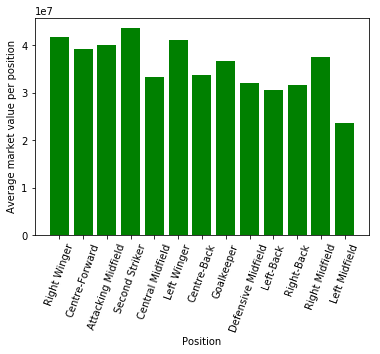

In [48]:
#Plotting a bar chart to show the relationship between the Position and the corresponding Average Market Value

plt.bar(x,y, color = 'green')
plt.xticks(rotation = 70)
plt.xlabel('Position')
plt.ylabel('Average market value per position')
plt.show()



It's hard to tell from the visualization above if their is actually any relational order in the Position variable. Since most soccer positions can be divided up into three major categories: Strikers, midfielders, and defenders , I classified the Position into the three categories to further investigate a relational order.



In [37]:
#Converting the positions into the main categories: Striker, Midfielder, Defender

footballData['newPosition'] = footballData.Position.map({'Right Winger':'Striker', 'Centre-Forward':'Striker',\
                                                         'Attacking Midfield':'Midfielder', 'Second Striker':'Striker',\
                                                         'Central Midfield':'Midfielder', 'Left Winger':'Striker',\
                                                         'Centre-Back':'Defender', 'Goalkeeper':'Defender',  \
                                                         'Defensive Midfield':'Midfielder', 'Left-Back':'Defender',\
                                                         'Right-Back':'Defender', 'Right Midfield':'Midfielder',\
                                                         'Left Midfield':'Midfielder'})
footballData.tail(3)

,Position,Age,Market Value,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosition
497,Left Winger,24,16000000,31,4,0,4,5,0,0,11,12,Striker
498,Goalkeeper,21,16000000,6,0,0,0,0,0,0,0,0,Defender
499,Right-Back,22,16000000,26,2,0,2,1,0,0,7,2,Defender


In [38]:
#Creating a list of list containing the new Positions and the corresponding Market Value

newPosition = footballData['newPosition']
marketValue = footballData['Market Value']
newPosMar = pd.concat((newPosition, marketValue), axis=1, ignore_index= True)
newPosMar = newPosMar.to_dict('split')
newListPosMar = newPosMar['data']
newListPosMar[:3]

[['Striker', 200000000], ['Striker', 160000000], ['Striker', 150000000]]

In [40]:
#Creating a dictionary from the list of list above to store the TOTAL market value for each unique new position in the dataset

newDicPosMar = {}
for i in range(len(newListPosMar)):
    if newListPosMar[i][0] in newDicPosMar.keys():
        newDicPosMar[newListPosMar[i][0]] += newListPosMar[i][1]
    else:
        newDicPosMar[newListPosMar[i][0]] = newListPosMar[i][1]
newDicPosMar

{'Striker': 7080000000, 'Midfielder': 5786000000, 'Defender': 5242000000}

In [43]:
#Creating a dictionary to store the total number of people in the dataset per new position

newNumPerPos = {}
for i in range(len(newListPosMar)):
    newNumPerPos.setdefault(newListPosMar[i][0], 0)
    newNumPerPos[newListPosMar[i][0]] += 1
newNumPerPos

{'Striker': 174, 'Midfielder': 168, 'Defender': 158}

In [44]:
#Creating a dictionary to store the average market value per new position

newAveValPerPos = {}
newPosList = list(newDicPosMar.keys())
for i in range(len(list(newPosList))):
    newAveValPerPos.setdefault(newPosList[i], (round((newDicPosMar[newPosList[i]]/newNumPerPos[newPosList[i]]), 2)))
newAveValPerPos

{'Striker': 40689655.17, 'Midfielder': 34440476.19, 'Defender': 33177215.19}

In [45]:
#Preparing two lists containing the Positons and the corresponding Average market value per new position for visualization

newAveValPerPosList = []
for i in range(len(list(newAveValPerPos.keys()))):
    newTempList = []
    newTempList.append(list(newAveValPerPos.keys())[i])
    newTempList.append(list(newAveValPerPos.values())[i])
    newAveValPerPosList.append(newTempList)
newX = []
newY = []
for i in range(len(newAveValPerPosList)):
    newX.append(newAveValPerPosList[i][0])
    newY.append(newAveValPerPosList[i][1])
newX, newY

(['Striker', 'Midfielder', 'Defender'],
 [40689655.17, 34440476.19, 33177215.19])

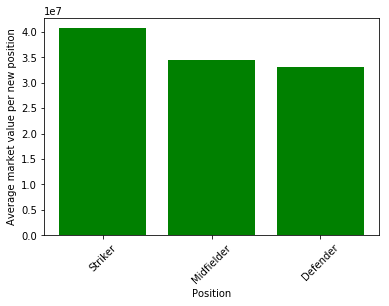

In [47]:
#Plotting a bar chart to show the relationship between the Position and the corresponding Average Market Value

plt.bar(newX,newY, color = 'green')
plt.xticks(rotation = 45)
plt.xlabel('Position')
plt.ylabel('Average market value per new position')
plt.show()

On the average, Strikers are usually worth more than Midfielders and Midfielders are usually worth more than the Defeneders. This is as expected. Hence, I believe their is a relational order and therefore I would assign the highest priority to Strikers followed by Midfielders and then Defenders.

In [50]:
#Encoding the newPosition column with Strikers assisgned 2, Midfielders assigned 1 and Defenders assigned 0

'''footballData['newPosEncoded'] = footballData.newPosition.map({'Striker':2, 'Midfielder':1, 'Defender':0})'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
footballData['newPosEncoded'] = le.fit_transform(footballData['newPosition'])
footballData.head()

,Position,Age,Market Value,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosition,newPosEncoded
0,Right Winger,20,200000000,30,24,0,13,4,0,1,5,5,Striker,2
1,Right Winger,31,160000000,26,27,0,17,1,0,0,3,1,Striker,2
2,Centre-Forward,25,150000000,36,21,0,9,5,0,0,4,5,Striker,2
3,Attacking Midfield,27,150000000,16,4,0,4,2,0,0,6,9,Midfielder,1
4,Attacking Midfield,26,140000000,34,9,0,5,1,0,0,9,14,Midfielder,1


In [51]:
#Creating a copy of the dataset

copyFootballData = footballData.copy(deep = True)

In [52]:
#Creating the features and the target variables Dataframe: copyFootballDataX and copyFootballDatay

copyFootballDataX = copyFootballData.drop(['Position', 'Market Value', 'newPosition'], axis = 1)
copyFootballDatay = copyFootballData['Market Value']
copyFootballDataX.head()

,Age,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosEncoded
0,20,30,24,0,13,4,0,1,5,5,2
1,31,26,27,0,17,1,0,0,3,1,2
2,25,36,21,0,9,5,0,0,4,5,2
3,27,16,4,0,4,2,0,0,6,9,1
4,26,34,9,0,5,1,0,0,9,14,1


To automatically select the highly statistically significant predictive variables, I used the Backward Elimination Algorithm (Stepwise Regression). The step by step process include:

- Step 1 : Select a significance level to stay in the model (I arbitrarily chose 0.05 as the sigbificance level)
- Step 2 : Fit the model with all the possible predictors (All-in)
- Step 3 : Consider the predictor with the highest P-value. If the P-value is greater than the signficance level, go to step 4, else end the program
- Step 4 : Remove the predictor
- Step 5 : Fit model without this variable and go back to step 3

I used the statsmodels library to implement this algorithm. Unlike the LinearRegression class from scikit-learn that automatically helps to add the intercept(constant term), the statsmodels requires this to be done manually.

In [53]:
#Adding the intercept term to the features dataframe

intercept = pd.Series(np.ones((500,)).astype(int))
copyFootballDataX = pd.concat((intercept.rename('intercept'),copyFootballDataX), axis = 1)
copyFootballDataX.head()

,intercept,Age,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosEncoded
0,1,20,30,24,0,13,4,0,1,5,5,2
1,1,31,26,27,0,17,1,0,0,3,1,2
2,1,25,36,21,0,9,5,0,0,4,5,2
3,1,27,16,4,0,4,2,0,0,6,9,1
4,1,26,34,9,0,5,1,0,0,9,14,1


In [64]:
#Implementing the Baackward Elimination Algorithm

import statsmodels.formula.api as sm

#Arbitrarily selecting the significance level as 0.05 to stay in the model
sigLevel = 0.05

#Fitting the model with all the possible predictors
model = sm.OLS(copyFootballDatay, copyFootballDataX).fit()
pVals = model.pvalues

#Steps 3 to 5 inside the  while loop
while pVals[np.argmax(pVals)] > sigLevel:
    copyFootballDataX = copyFootballDataX.drop([np.argmax(pVals)], axis = 1)
    model = sm.OLS(copyFootballDatay, copyFootballDataX).fit()
    pVals = model.pvalues

#Printing the summary of the final model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Market Value   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     43.06
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.25e-31
Time:                        10:53:23   Log-Likelihood:                -9152.0
No. Observations:                 500   AIC:                         1.831e+04
Df Residuals:                     495   BIC:                         1.834e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       2.07e+07   3.61e+06      5.734      0.000    1.36e+07    2.78e+07
Matches        3.656e+05   1.42e+05      2.579      0.010    8.71e+04    6.44e+05
Goals          2.078e+06    2.8e+05      7.425      0.000    1.53e+06    2.63e+06
Assists        1.115e+06   3.85e+05      2.897      0.004    3.59e+05    1.87e+06
newPosEncoded -5.662e+06   1.51e+06     -3.740      0.000   -8.64e+06   -2.69e+06
==============================================================================
Omnibus:                      185.151   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.436
Skew:                           1.631   Prob(JB):                    4.13e-169
Kurtosis:                       8.156   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hence, the highly statistically signficant features are:

- Matches
- Goals
- Assists
- newPoistionEncoded (Position)

This makes sense.

Up next:

Checking if the following assumptions of Linear Regression are met:
- Homoscedasticity : Constant error variance
- Independence of Erros : No autocorrelation
- Absence of Multicollinearity : If the Variance Inflation Factor is between 5-10, multicolinearity is likely present.

Finally, Building a Polynomial Linear Regression model to improve on Adjusted R squared which is a goodness of fit.

In [80]:
#creating arrays to check for assumptions and to build the multiple linear regression and polynomial linear regression model

X = copyFootballDataX.iloc[:,[1,2,3,4]].values
y = copyFootballDatay.iloc[:,].values
X.shape,y.shape

((500, 4), (500,))

In [81]:
#Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state = 0)
X_train.shape,y_train.shape

((400, 4), (400,))

In [82]:
#Fitting the Multiple Linear Regression model, and calculating the residuals

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
residual = y_test - y_pred
residual = pd.Series(residual)

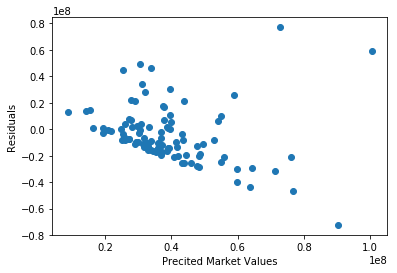

In [83]:
#Homoscedasticity
plt.scatter(y_pred, residual)
plt.xlabel('Precited Market Values')
plt.ylabel('Residuals')
plt.show()

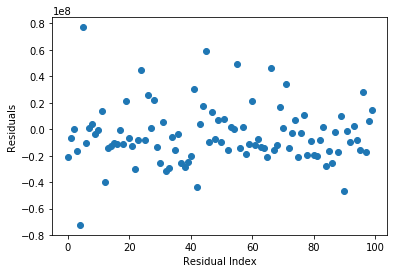

2.2587823383954793

In [84]:
#Independence of errors
plt.scatter(residual.index, residual.values)
plt.xlabel('Residual Index')
plt.ylabel('Residuals')
plt.show()
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residual)

In [108]:
#Detecting multicollinearity using Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = ['Matches', 'Goals', 'Assits', 'Position']
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.round(2)

,features,VIF Factor
0,Matches,3.00
1,Goals,3.36
2,Assits,3.27
3,Position,3.31


The three assumptions above were met.

In [109]:
#Creating Polynomial Regressors

from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree = 2)
polyX = polyReg.fit_transform(X[:,[1,2]])
polyX = np.append(polyX, X[:,[0,3]], axis = 1)

In [97]:
#splitting the dataset into training and test set

trainPolyX, testPolyX, trainPolyy, testPolyy = train_test_split(polyX, y, test_size = 0.2, random_state = 0) 

In [99]:
#fitting the model and displaying the summary

modelPoly = sm.OLS(trainPolyy, trainPolyX).fit()
modelPoly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           6.76e-36
Time:                        11:27:15   Log-Likelihood:                -7294.5
No. Observations:                 400   AIC:                         1.460e+04
Df Residuals:                     392   BIC:                         1.464e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.889e+07   3.73e+06      5.060      0.000    1.15e+07    2.62e+07
x1         -8.818e+05    7.7e+05     -1.145      0.253    -2.4e+06    6.32e+05
x2         -7.942e+05    8.6e+05     -0.924      0.356   -2.48e+06    8.96e+05
x3          5.429e+04   4.49e+04      1.210      0.227   -3.39e+04    1.42e+05
x4          3.442e+05   8.28e+04      4.159      0.000    1.81e+05    5.07e+05
x5         -1.452e+04   8.65e+04     -0.168      0.867   -1.85e+05    1.56e+05
x6          6.734e+05   1.54e+05      4.383      0.000    3.71e+05    9.75e+05
x7         -1.938e+06   1.71e+06     -1.136      0.256   -5.29e+06    1.42e+06
==============================================================================
Omnibus:                      130.950   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.795
Skew:                           1.396   Prob(JB):                    9.05e-116
Kurtosis:                       7.898   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""